### Student Performance Indicator

Life cycle of Machine Learning Project

1. understanding the problem statement
2. Data Collection
3. Data checks to perform
4. EDA
5. Data pre-processing
6. Model Training
7. Choose best model

1) problem statement
. This project understand how the stedent's performance (test score) is affected by other variables such as Gender, Ethinicity, Parental level of
    education, Lunch and Test preparation

2) Data Collection
  . Dataset source - kaggle
  . The data consist of 8 column and 1000 rows.

  2.1 Import Data and Required Packages
      importing pandas, numpy, matplotlib, seaborn and warnings library
      

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data\data.csv")


In [3]:
### Show top 5 records

df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#shape of the dataset
df.shape

(1000, 8)

2.2. Dataset information\n
  . gender : sex of students -> (Male/Female)

  . race/ethinicity: ethinicity of students -> (Group A,B,C,D,E)

  . parental level of education: parents final education->(bachelor's degree, some college, master's degree, associate's degree,high school)

  . lunch: having lunch before test (standard, free/reduced)

  . test_preparation_course: completed or not completed before test
  
  . math score

  . reading score
  
  . writing score


### 3. Data checks to perform
   
   .Check missing values

   .check duplicates

   .Check data type

   .Check the number of unique values of each column

   .Check statistic of dataset
   
   .Check various categories present in the different categorical column


In [5]:
### 3.1 Checking missing values

df.isna().sum(
    
)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### there is no missing values


In [7]:
###3.2 checking for duplicates

df.duplicated().sum()

np.int64(0)

###There are no duplicates values in the dataset

In [8]:
###3.3 Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
###3.4check the number of unique no of values for each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
###3.5 Checking the statistics of dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight of the above stats

1. mean of all three are very close to each other between 65 to 69
2. standard deviation of all three category are also very close to each other between 13 to 16
3. min score for math is 0, reading is 17 and writing is 10
4. max score for all the three subject is 100

In [22]:
###3.6 category wise data exploring

print("'category in gender' variables:", df["gender"].unique(), end = '')
print(".")
print("'category in grace_ethnicity' variables:", df["race_ethnicity"].unique(), end = '')
print(".")
print("'category in parental_level_of_education' variables:", df["parental_level_of_education"].unique(), end = '')
print(".")
print("'category in lunch' variables:", df["lunch"].unique(), end = '')
print(".")
print("'category in test_preparation_course' variables:", df["test_preparation_course"].unique(), end = '')
print(".")


'category in gender' variables: ['female' 'male'].
'category in grace_ethnicity' variables: ['group B' 'group C' 'group A' 'group D' 'group E'].
'category in parental_level_of_education' variables: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'].
'category in lunch' variables: ['standard' 'free/reduced'].
'category in test_preparation_course' variables: ['none' 'completed'].


In [23]:
### 3.7 adding columns total score and average score

df["total_score"] = df['math_score'] + df['reading_score'] + df["writing_score"]

df['average'] = df["total_score"]/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [29]:
math_full = df[df['math_score'] == 100]["average"].count()
reading_full = df[df['reading_score'] == 100]["average"].count()
writing_full = df[df['writing_score'] == 100]["average"].count()

print(f"no of student with full marks in maths : {math_full}")
print(f"no of student with full marks in reading : {reading_full}")
print(f"no of student with full marks in writing : {writing_full}")

no of student with full marks in maths : 7
no of student with full marks in reading : 17
no of student with full marks in writing : 14


In [31]:
mathLess20= df[df['math_score'] <= 20]["average"].count()
readingLess20= df[df['reading_score'] <= 20]["average"].count()
writingLess20= df[df['writing_score'] <= 20]["average"].count()

print(f"student with less then equal to 20 marks in maths :  {mathLess20}")
print(f"student with less then equal to 20 marks in reading :  {readingLess20}")
print(f"student with less then equal to 20 marks in writing :  {writingLess20}")

student with less then equal to 20 marks in maths :  4
student with less then equal to 20 marks in reading :  1
student with less then equal to 20 marks in writing :  3


### insight 

 from the above values we know that
 1. in reading students performed good in reading
 2. students performed worst in  maths

### 4. visualization
        4.1 UNIVARIATE visualize average score distribution to make some conclusion

        . Histogram
        . KDE



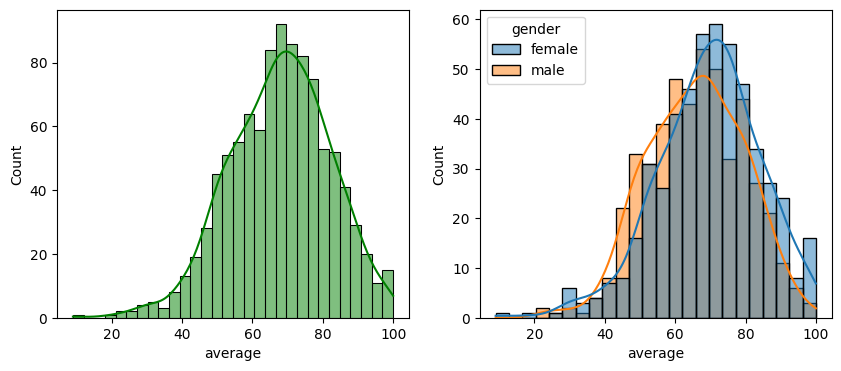

In [36]:
### 4.1.1 histogram and kde
fig, axs = plt.subplots(1,2, figsize = (10,4
                                        ))

plt.subplot(121)
sns.histplot(data = df, x="average",bins=30,kde=True, color='g')

plt.subplot(122)
sns.histplot(data = df, x="average",kde=True, hue='gender')

plt.show()

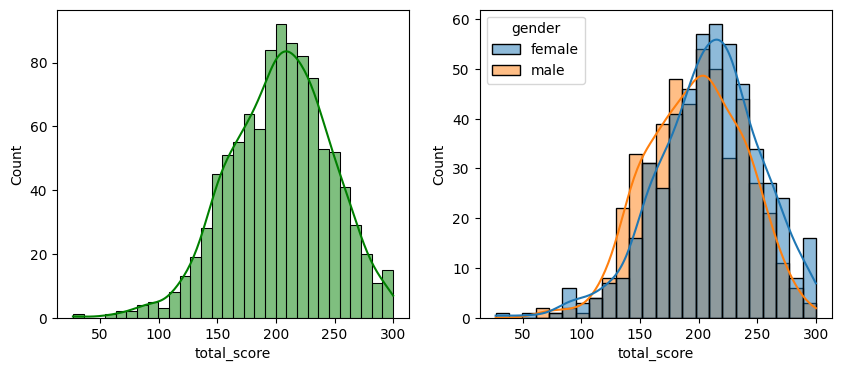

In [37]:
### 4.1.2 histogram and kde
fig, axs = plt.subplots(1,2, figsize = (10,4
                                        ))

plt.subplot(121)
sns.histplot(data = df, x="total_score",bins=30,kde=True, color='g')

plt.subplot(122)
sns.histplot(data = df, x="total_score",kde=True, hue='gender')

plt.show()

###insight

from the above graph we come to know that female student is performing well as compared to male student

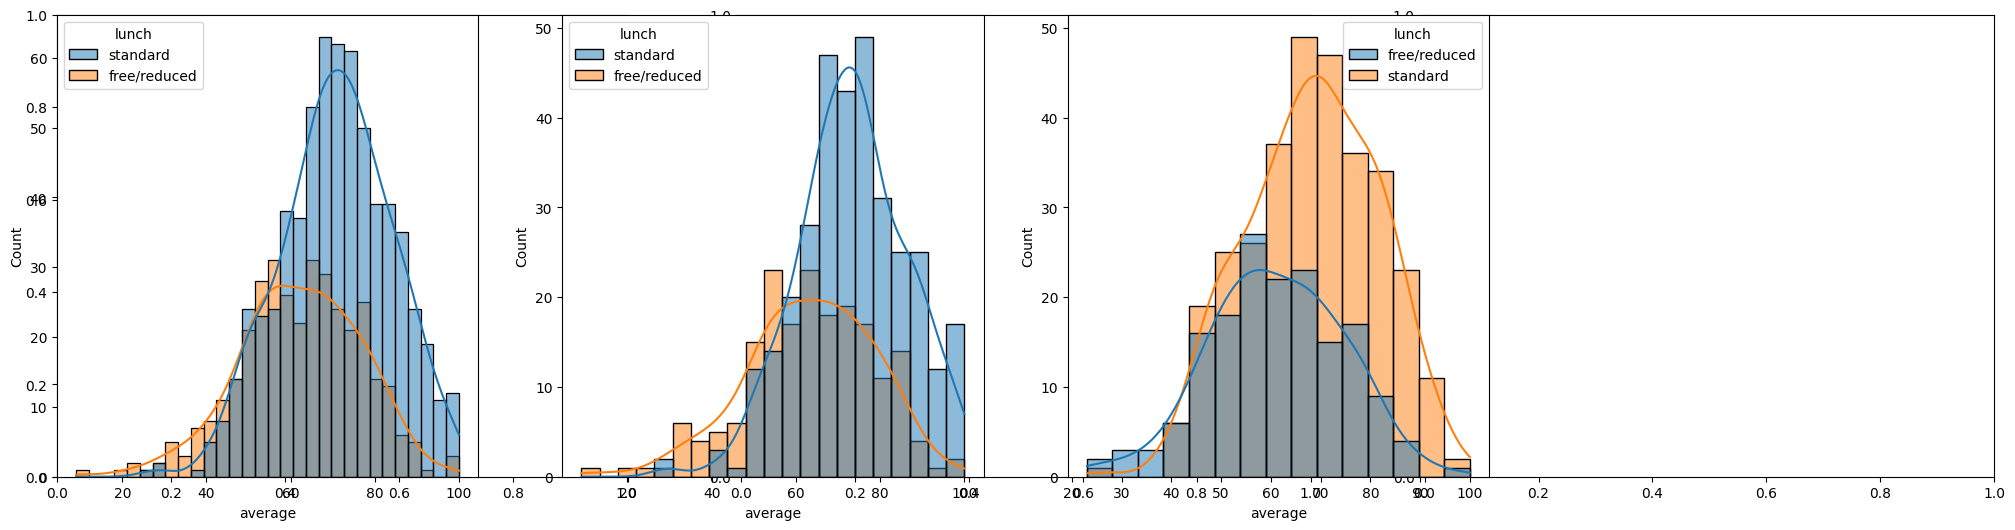

In [45]:
### 4.1.3 histogram and kde
fig, axs = plt.subplots(1,3, figsize = (25,6))

plt.subplot(141)
sns.histplot(data = df, x="average",bins=30,kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data = df[df["gender"]=="female"], x="average",kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data = df[df["gender"]=="male"], x="average",kde=True, hue='lunch')

plt.show()

### insight 
    standard lunch helps perform well in exam 
    standard lunch helps perform well in exam be it male or female

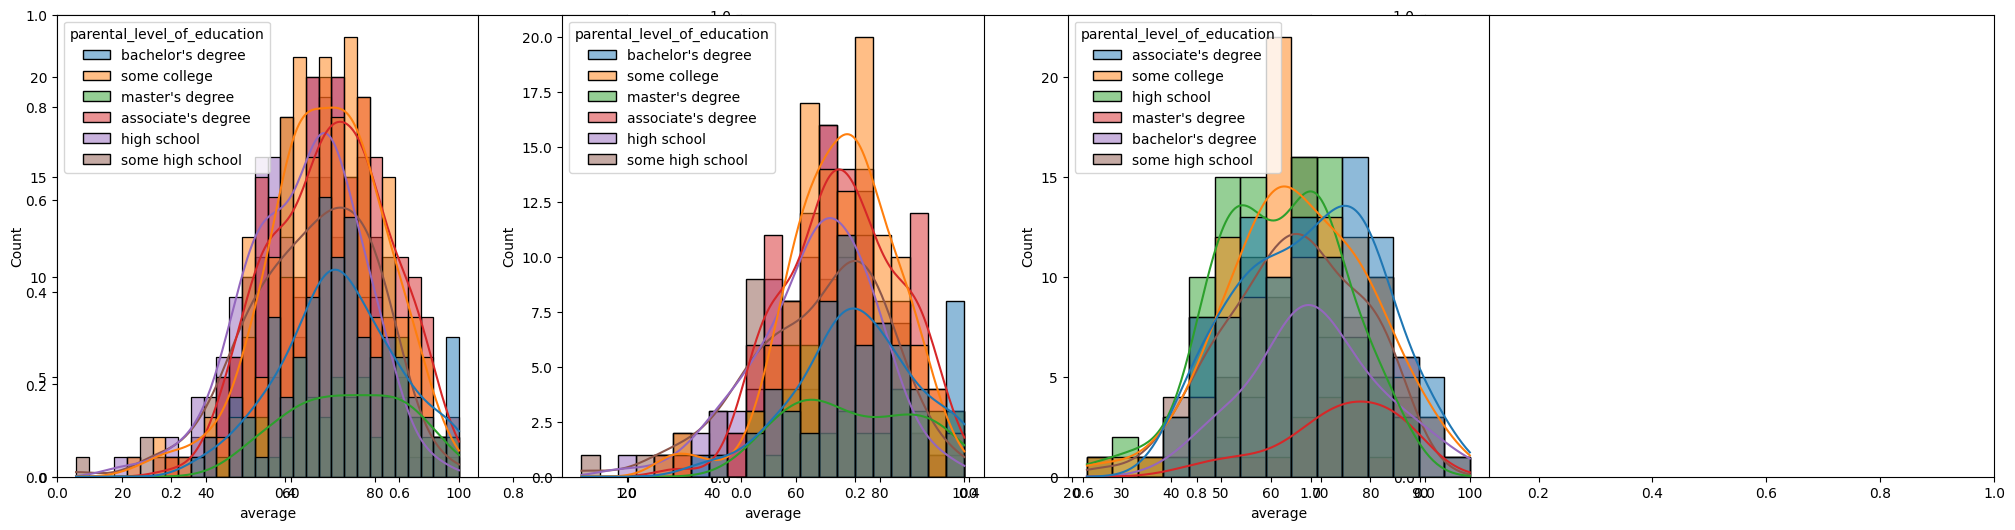

In [47]:
### 4.1.4 histogram and kde

fig, axs = plt.subplots(1,3, figsize = (25,6))

plt.subplot(141)
sns.histplot(data = df, x="average",bins=30,kde=True, hue='parental_level_of_education')

plt.subplot(142)
sns.histplot(data = df[df["gender"]=="female"], x="average",kde=True, hue='parental_level_of_education')

plt.subplot(143)
sns.histplot(data = df[df["gender"]=="male"], x="average",kde=True, hue='parental_level_of_education')

plt.show()

### insight

 . parents education didn't show much effect on the marks of the students
 

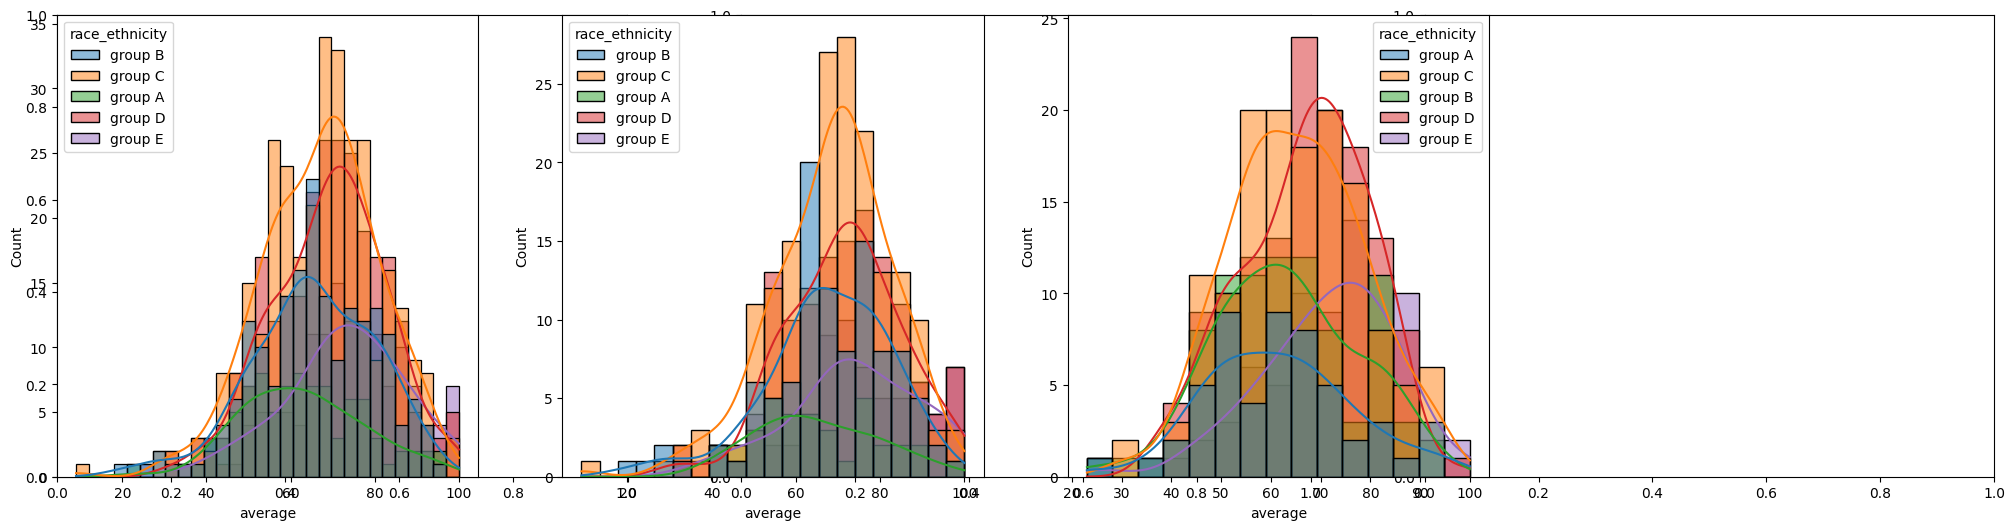

In [50]:
### 4.1.5 histogram and kde

fig, axs = plt.subplots(1,3, figsize = (25,6))

plt.subplot(141)
sns.histplot(data = df, x="average",bins=30,kde=True, hue='race_ethnicity')

plt.subplot(142)
sns.histplot(data = df[df["gender"]=="female"], x="average",kde=True, hue='race_ethnicity')

plt.subplot(143)
sns.histplot(data = df[df["gender"]=="male"], x="average",kde=True, hue='race_ethnicity')

plt.show()

### insight

 . student in group c performed well as compared to rest of the group and the performance of the students of group A is not so good 
 . male student of group c perfomed well then rest of the group and the perfomance of group A is not good
 . female students of group D performed well the rest of the group and the performance of group A is not good

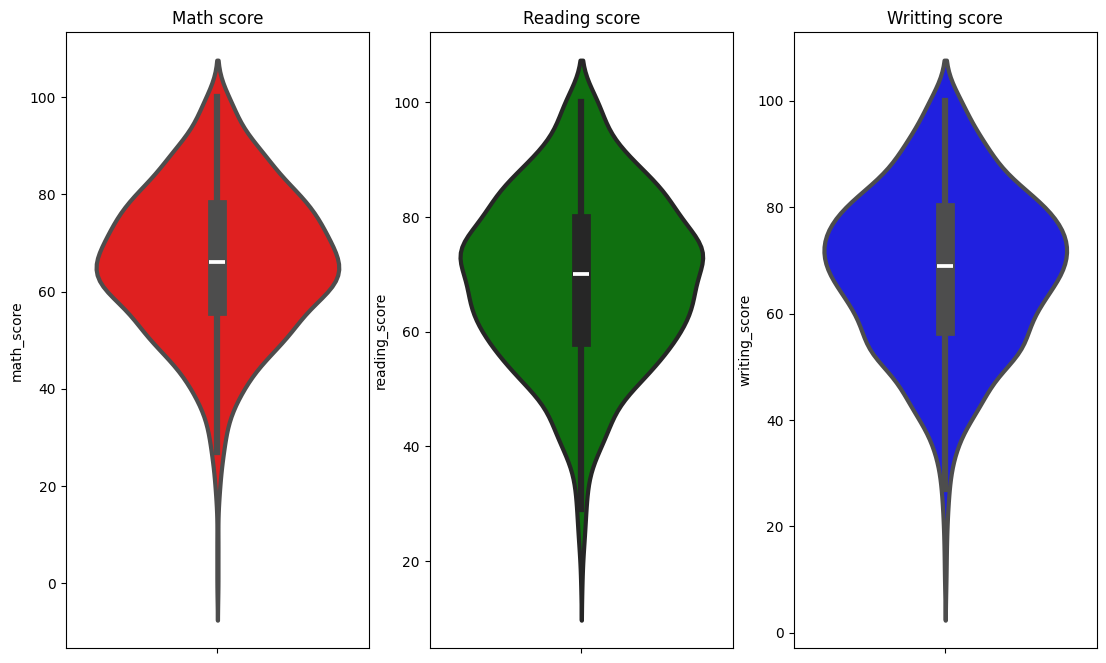

In [63]:
## 4.1.6 violinplot 

plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math score")
sns.violinplot(y="math_score",data=df,color='red',linewidth=3)

plt.subplot(1,4,2)
plt.title("Reading score")
sns.violinplot( y = "reading_score",data = df,color="green",linewidth=3)

plt.subplot(1,4,3)
plt.title("Writting score")
sns.violinplot(y="writing_score",data=df,color='blue',linewidth=3)

plt.show()

## insight

from the above three plot it is quiet visible that most students scores between 60 - 80 in maths 
and in reading and writing most students scores between 50-85
 

### 4.2 MULTIVARIATE ANALYSIS

4.2.1USING PIE PLOT

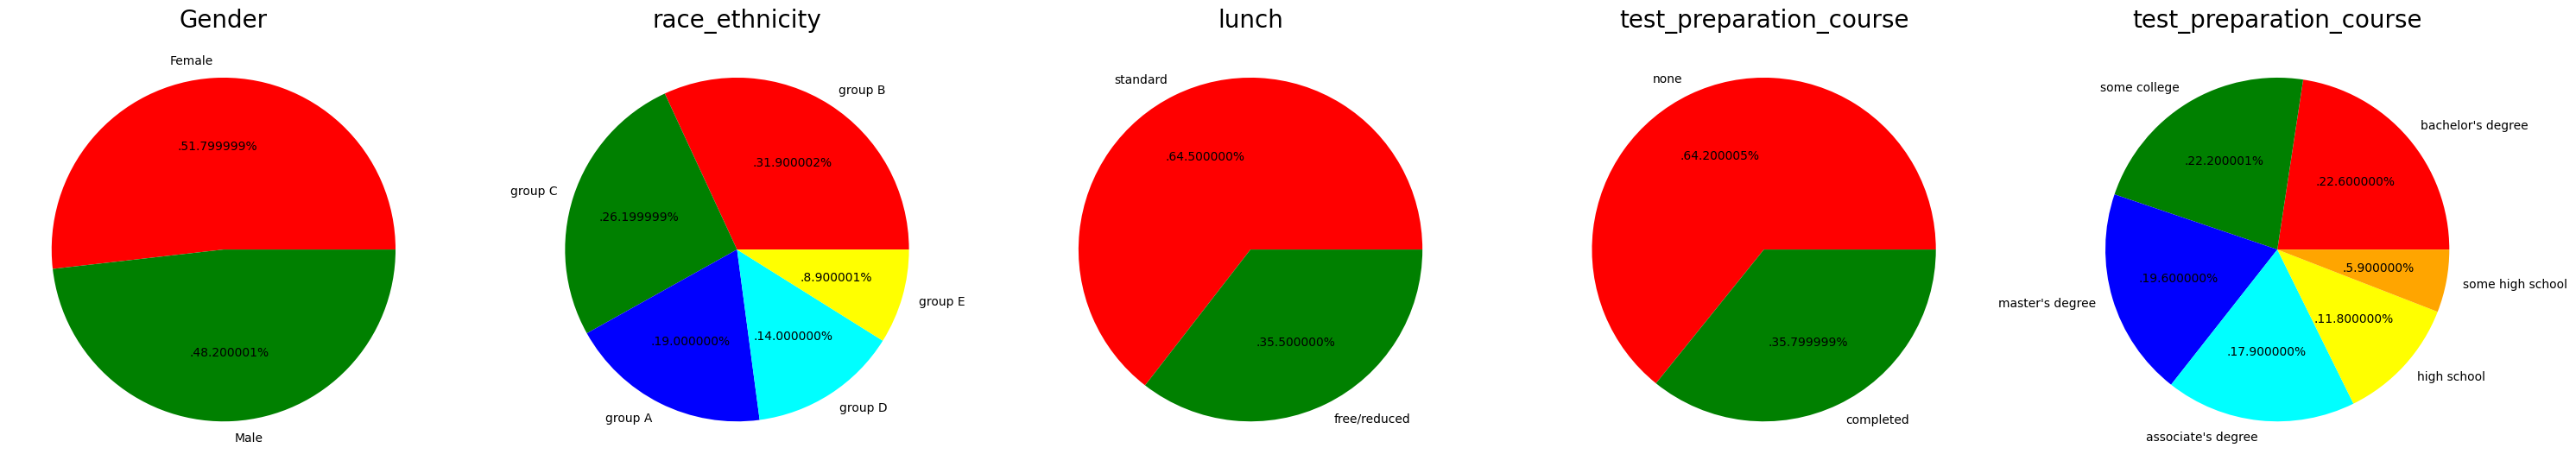

In [88]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']
plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['red','green','blue','cyan','yellow']
plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red','green']
plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red','green']
plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school'
color = ['red','green','blue','cyan','yellow','orange']
plt.pie(size,colors = color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

### insight

 . Number of Male and Female students is almost equal

 . Number of students are greatest in Group C
 
 . Number of students who have standard lunch are greater
 
 . Number of students who have not enrolled in any test preparation course is greater
 
 . Number of students whose parental eduaction is "some college" is greater

### 4.3 Feature Wise Visualization

##4.4.1 GENDER COLUMN

 .How is distribution of Gender ?

 .Is gender has any impact on student's performance ?
 
 .UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

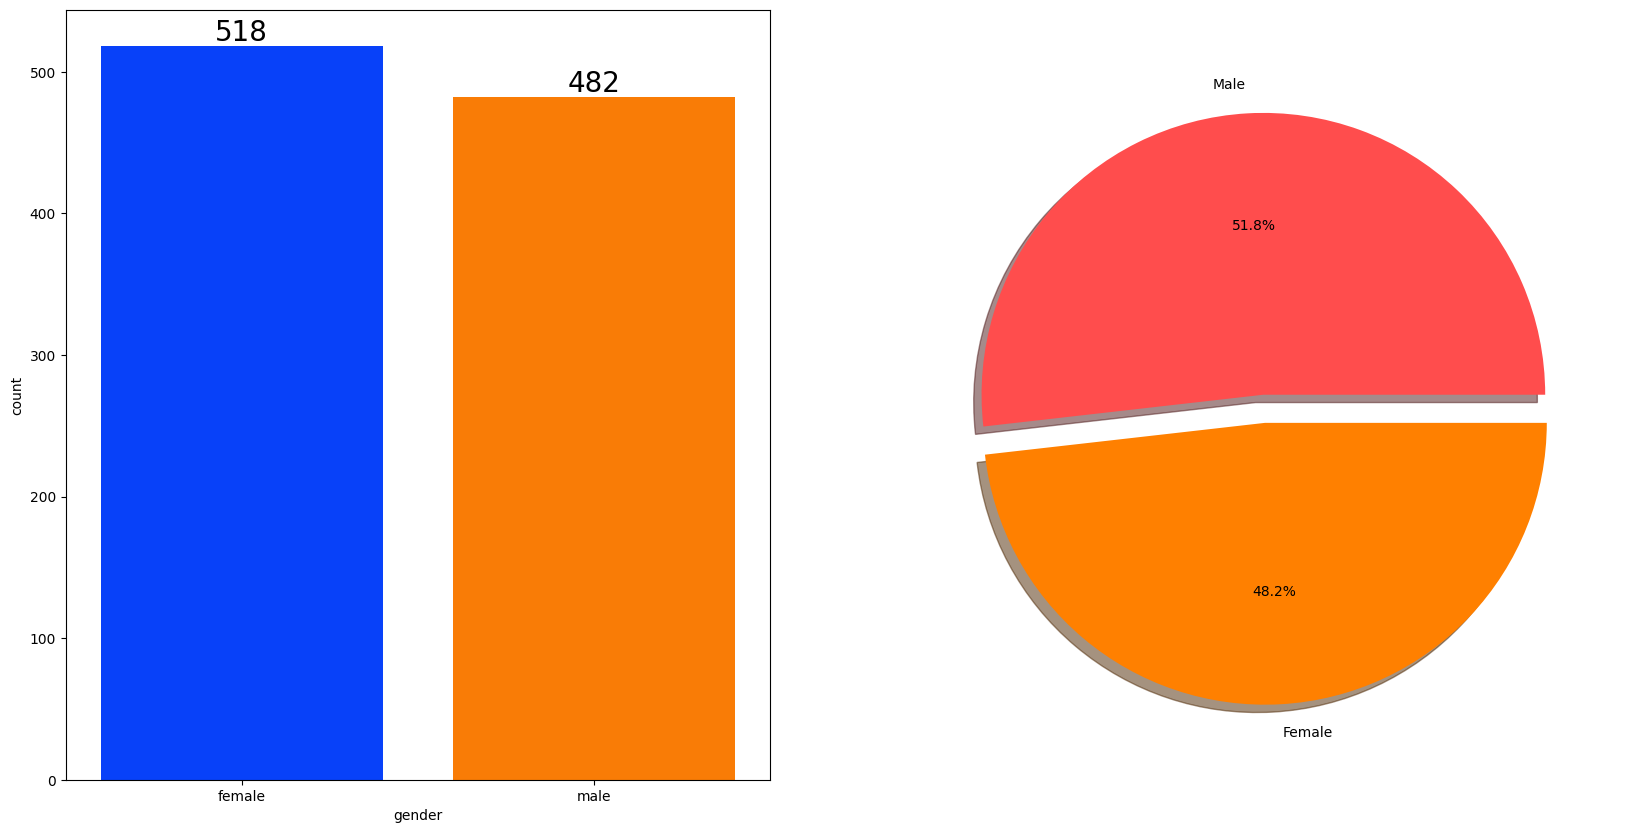

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

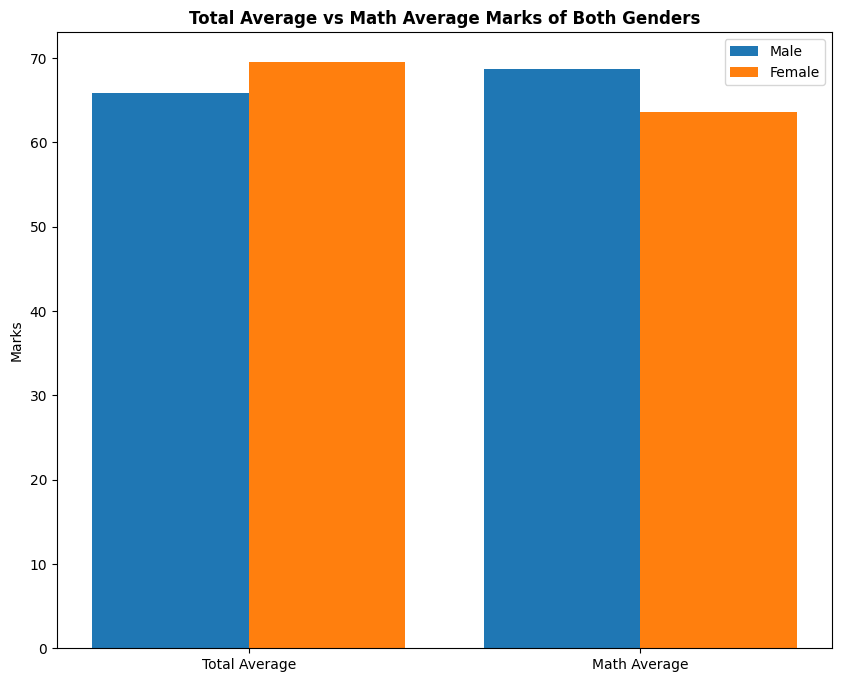

In [107]:
#4.3.1BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

gender_group = df.groupby('gender').mean(numeric_only=True)

# Define scores
X = ['Total Average', 'Math Average']
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

# Plot
X_axis = np.arange(len(X))
plt.figure(figsize=(10, 8))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()
plt.show()

###Insights

On an average females have a better overall score than male.

whereas males have scored higher in Maths.

###4.3.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

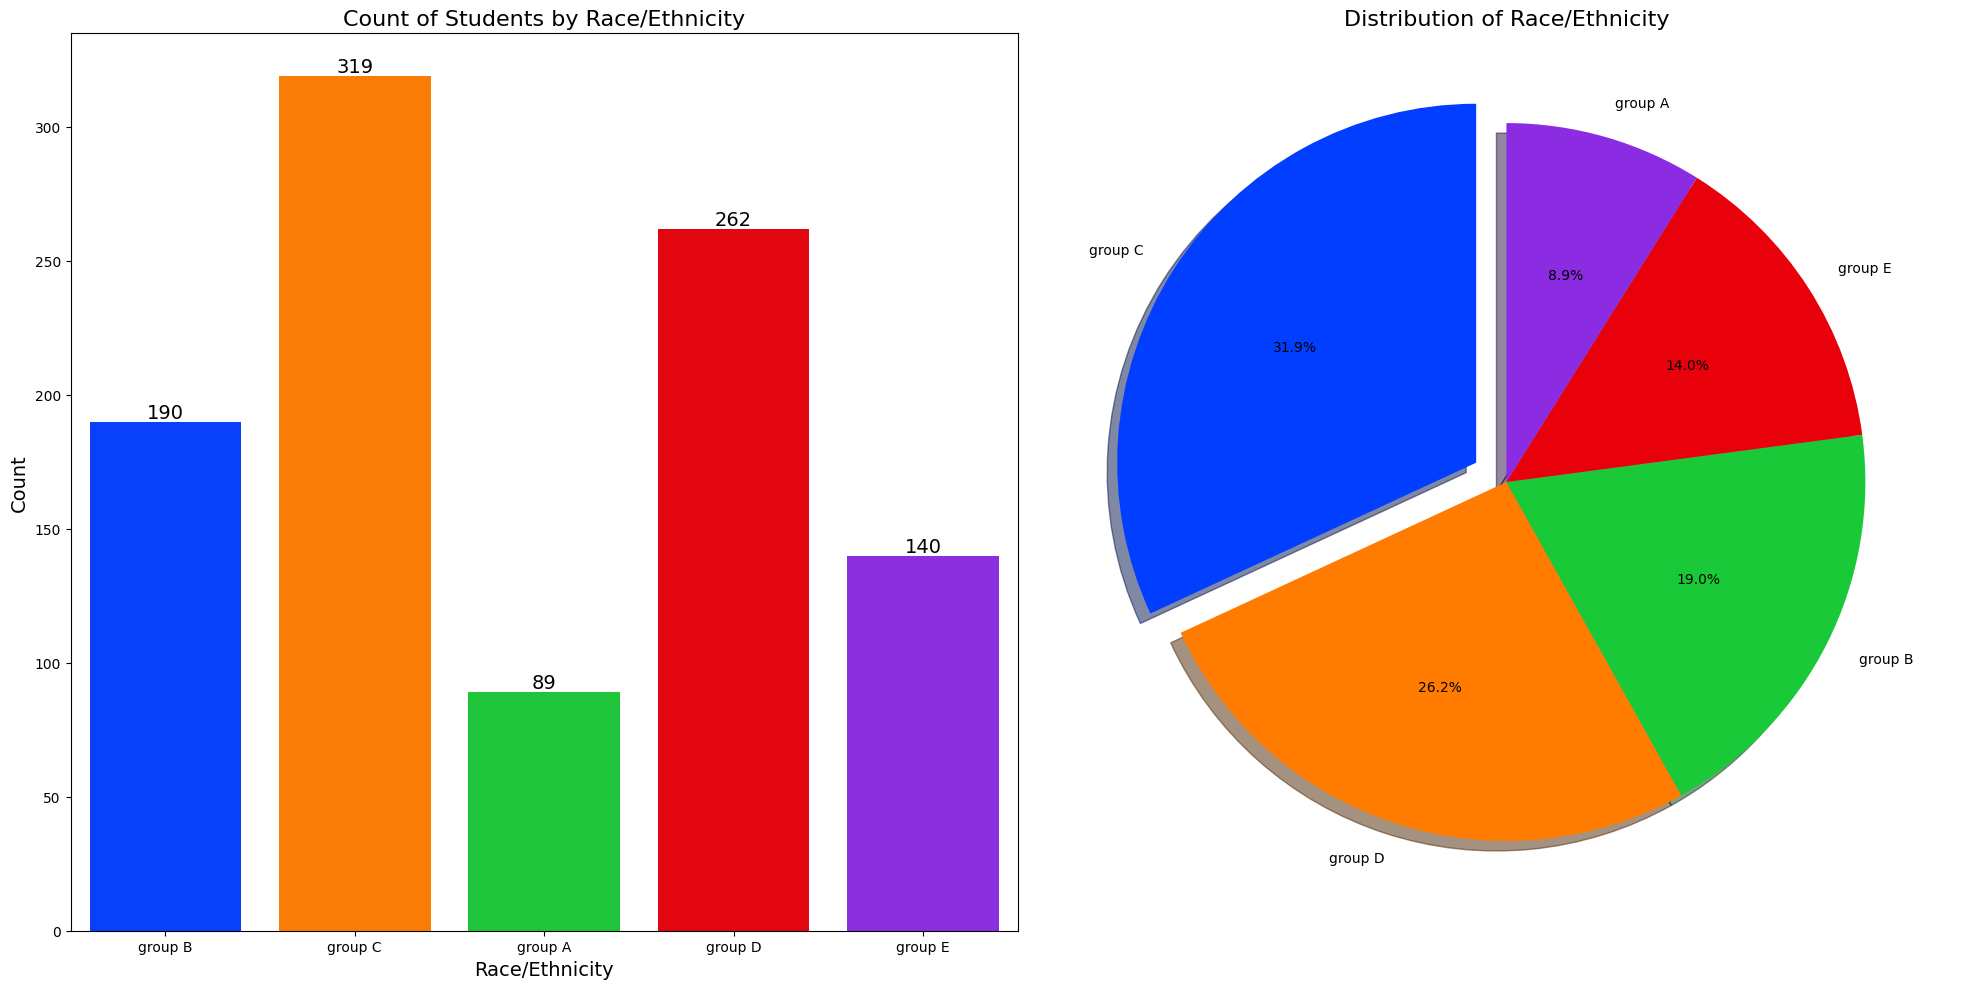

In [114]:

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title("Count of Students by Race/Ethnicity", fontsize=16)
ax[0].set_xlabel("Race/Ethnicity", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)


for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)


race_counts = df['race_ethnicity'].value_counts()

ax[1].pie(
    x=race_counts,
    labels=race_counts.index,
    explode=[0.1] + [0] * (len(race_counts) - 1),
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=sns.color_palette('bright')[:len(race_counts)]
)
ax[1].set_title("Distribution of Race/Ethnicity", fontsize=16)


plt.tight_layout()
plt.show()


Insights

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

### 4.3.3 BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

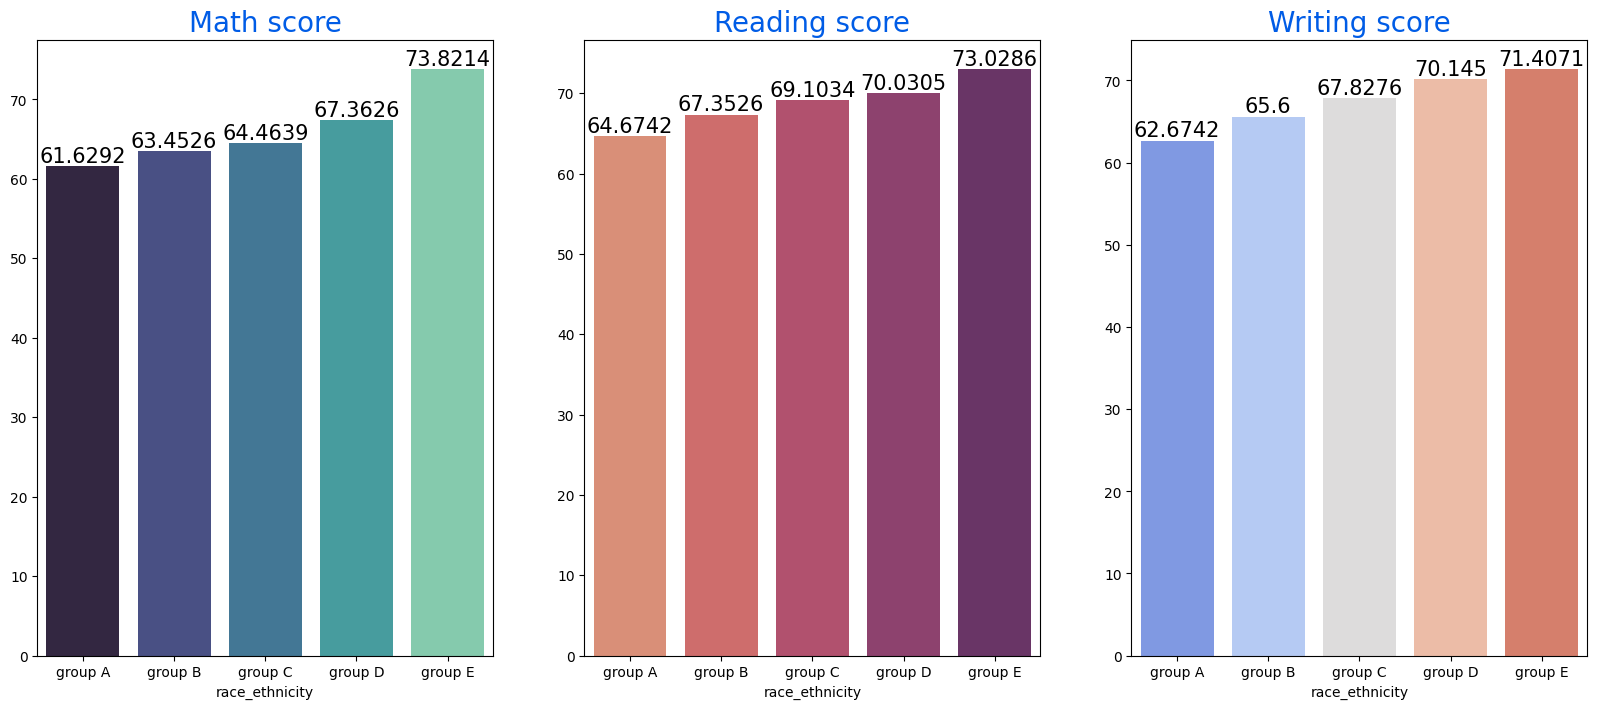

In [119]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.3.4 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

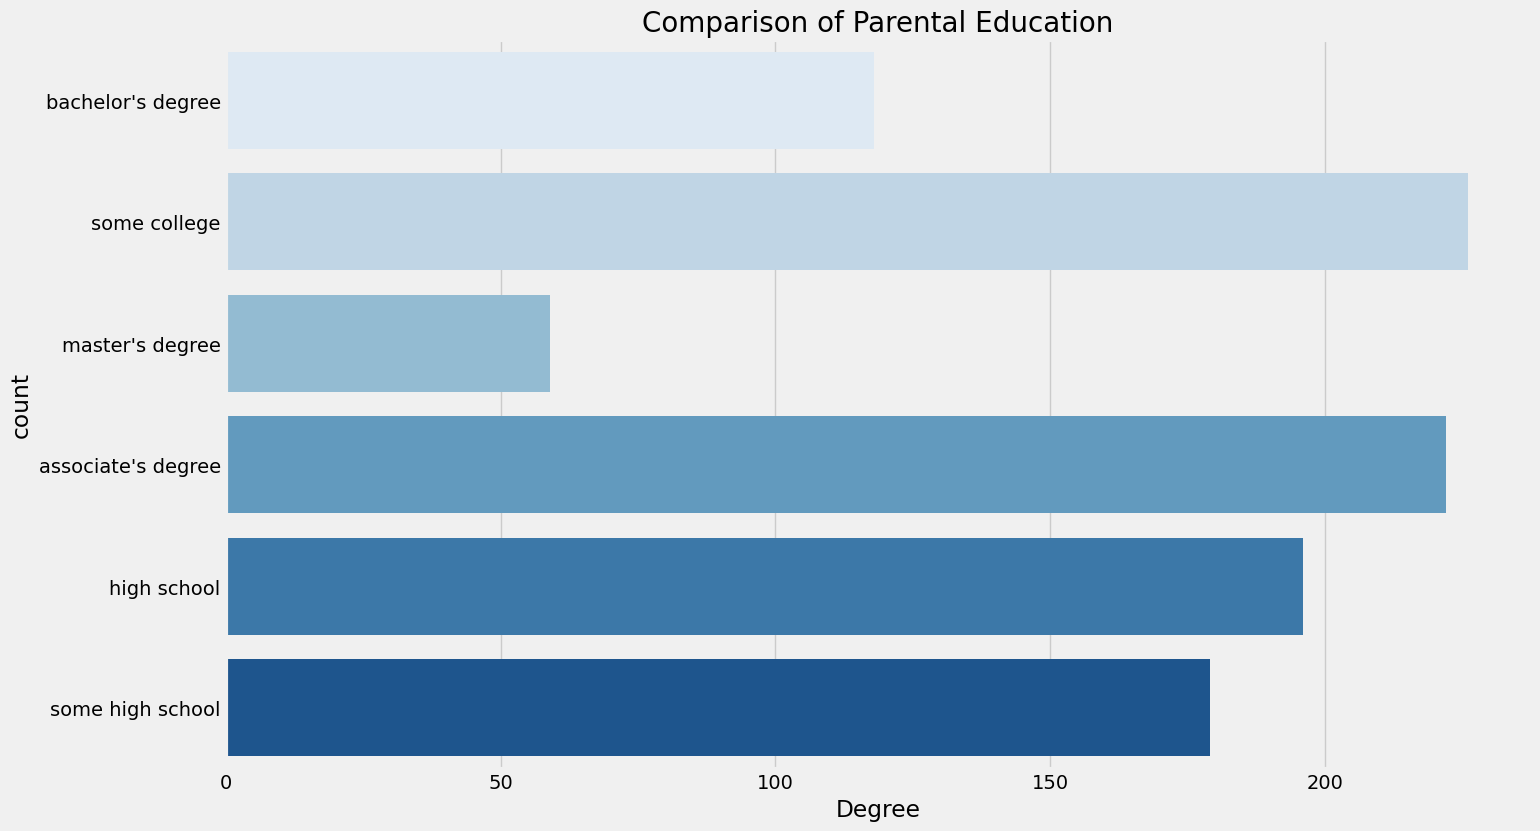

In [120]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

Largest number of parents are from some college.

### 4.3.5 BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

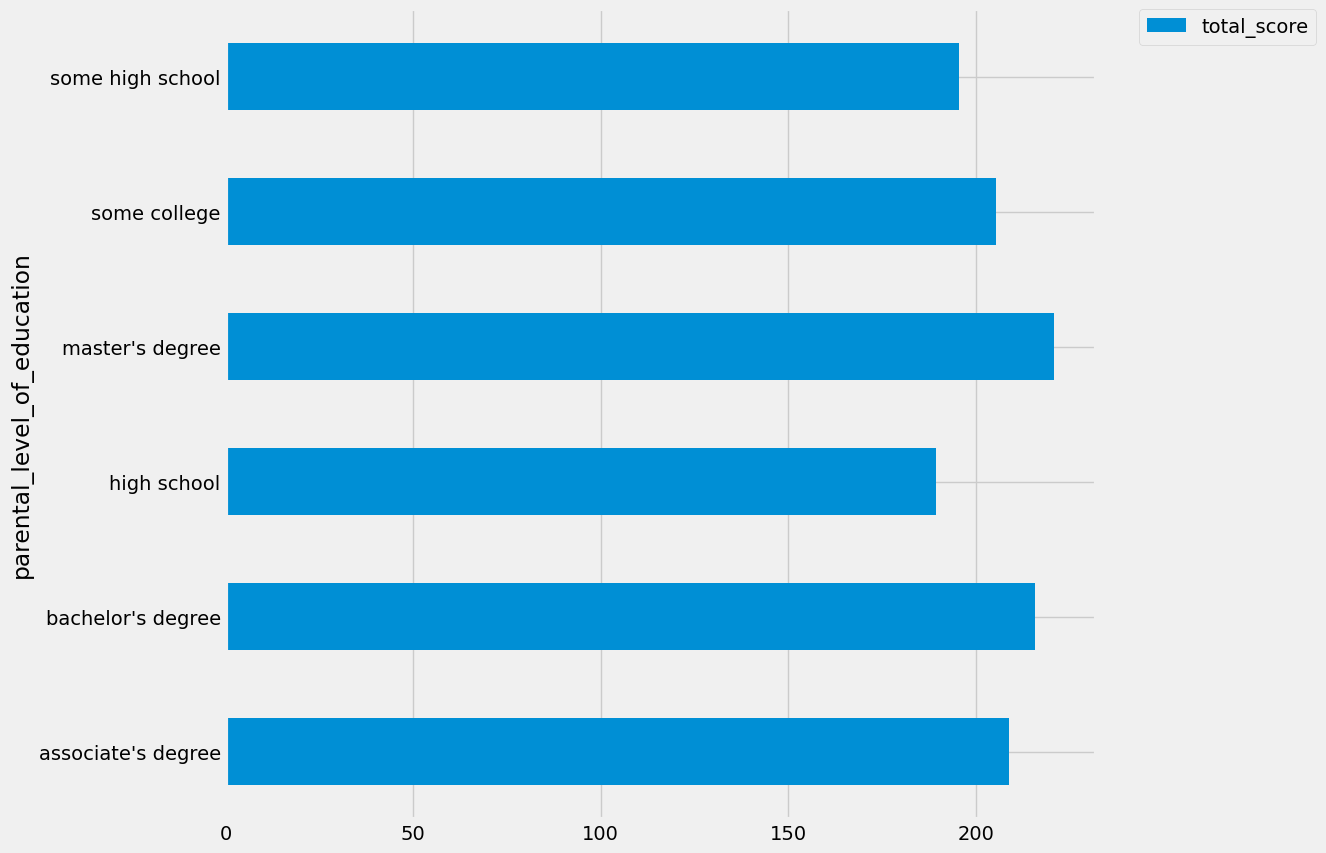

In [123]:
df.groupby('parental_level_of_education')["total_score"].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

 insight 
 
 The score of student whose parents possess master and bachelor level education are higher than others.

### 4.3.6 LUNCH COLUMN
Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?
UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

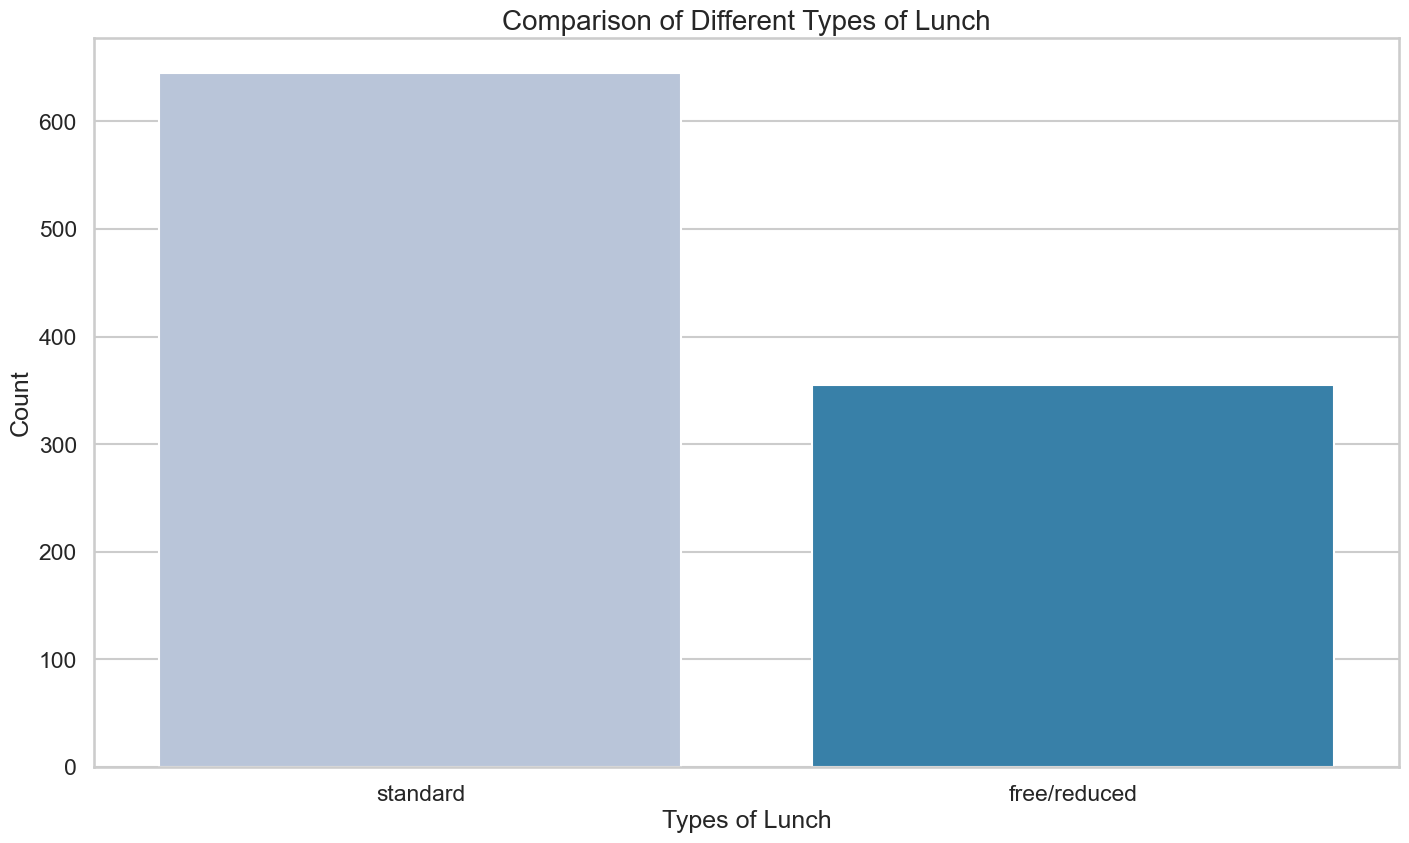

In [126]:

plt.rcParams['figure.figsize'] = (15, 9)
sns.set_context('talk')  
sns.set_style('whitegrid')


sns.countplot(x='lunch', data=df, palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


Insights

Students being served Standard lunch was more than free lunch

### 4.3.7 BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

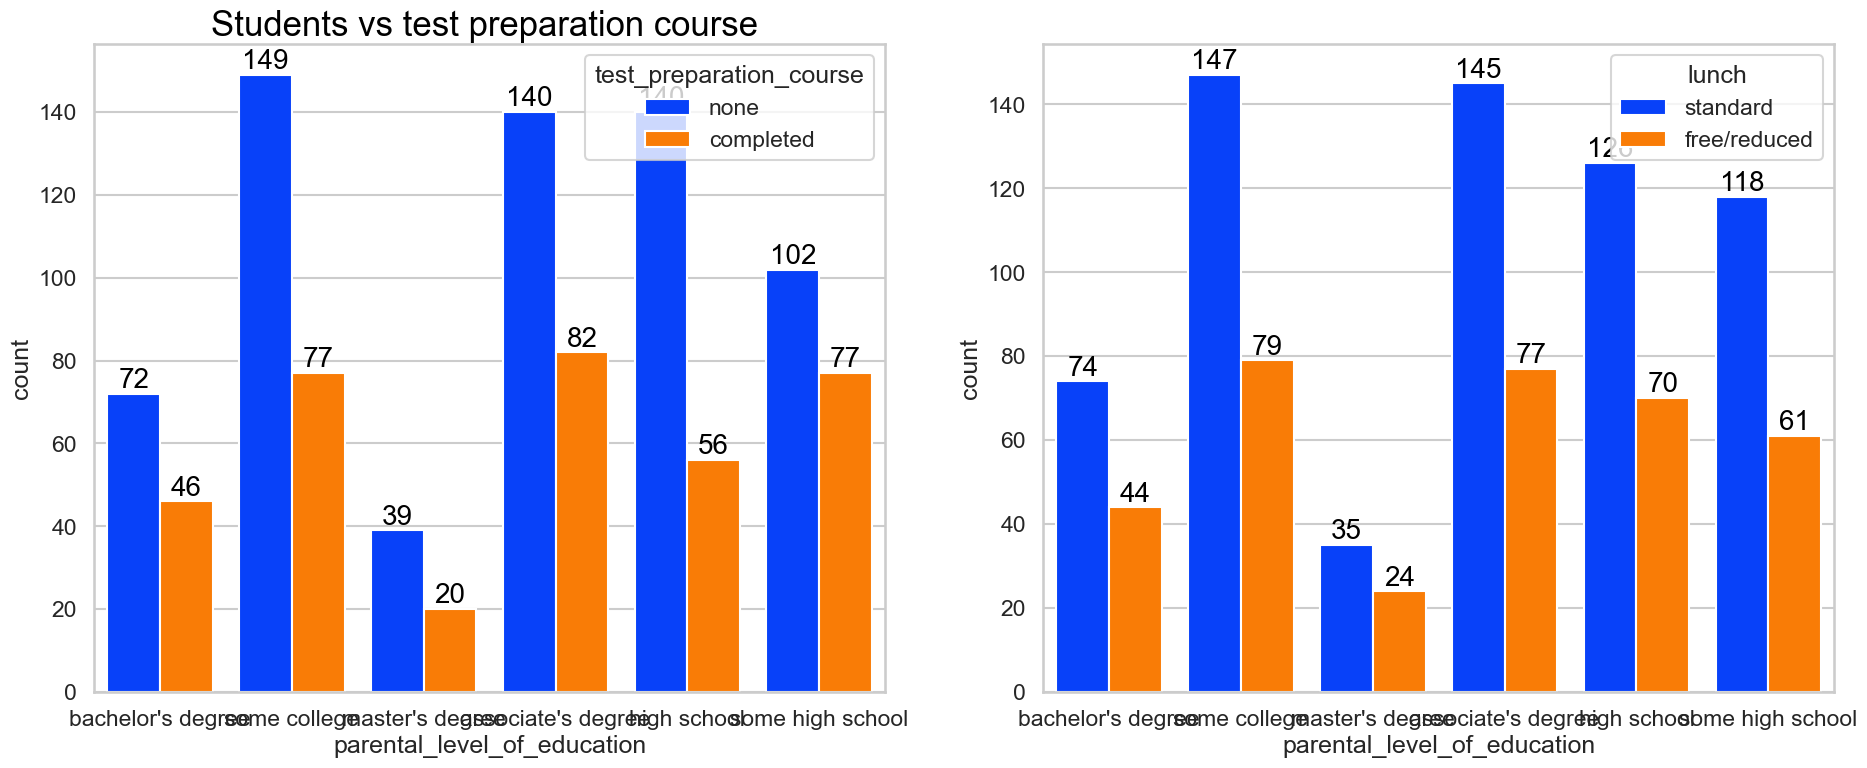

In [128]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.3.8 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

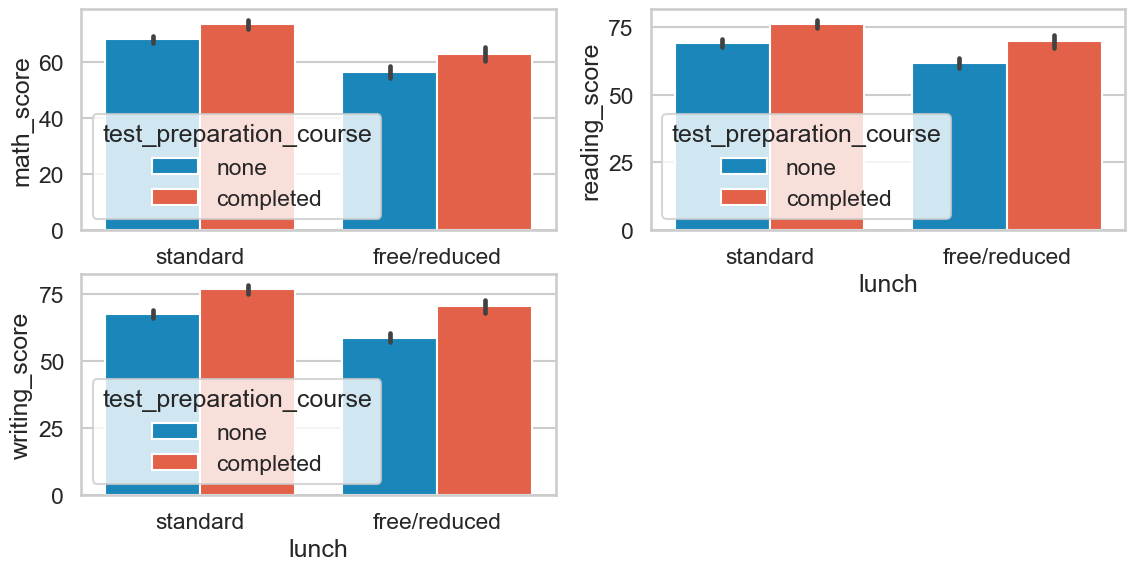

In [131]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])


Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


### 5 CHECKING OUTLIERS

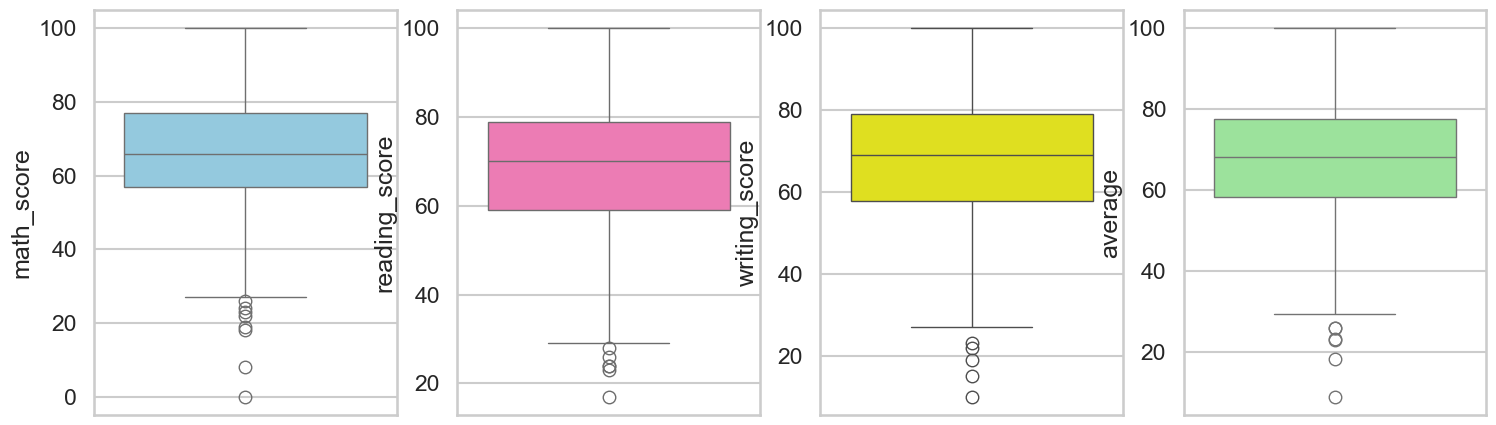

In [132]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

insight 

outliers seen in all score which is less then 25

### 6. MUTIVARIATE ANALYSIS USING PAIRPLOT

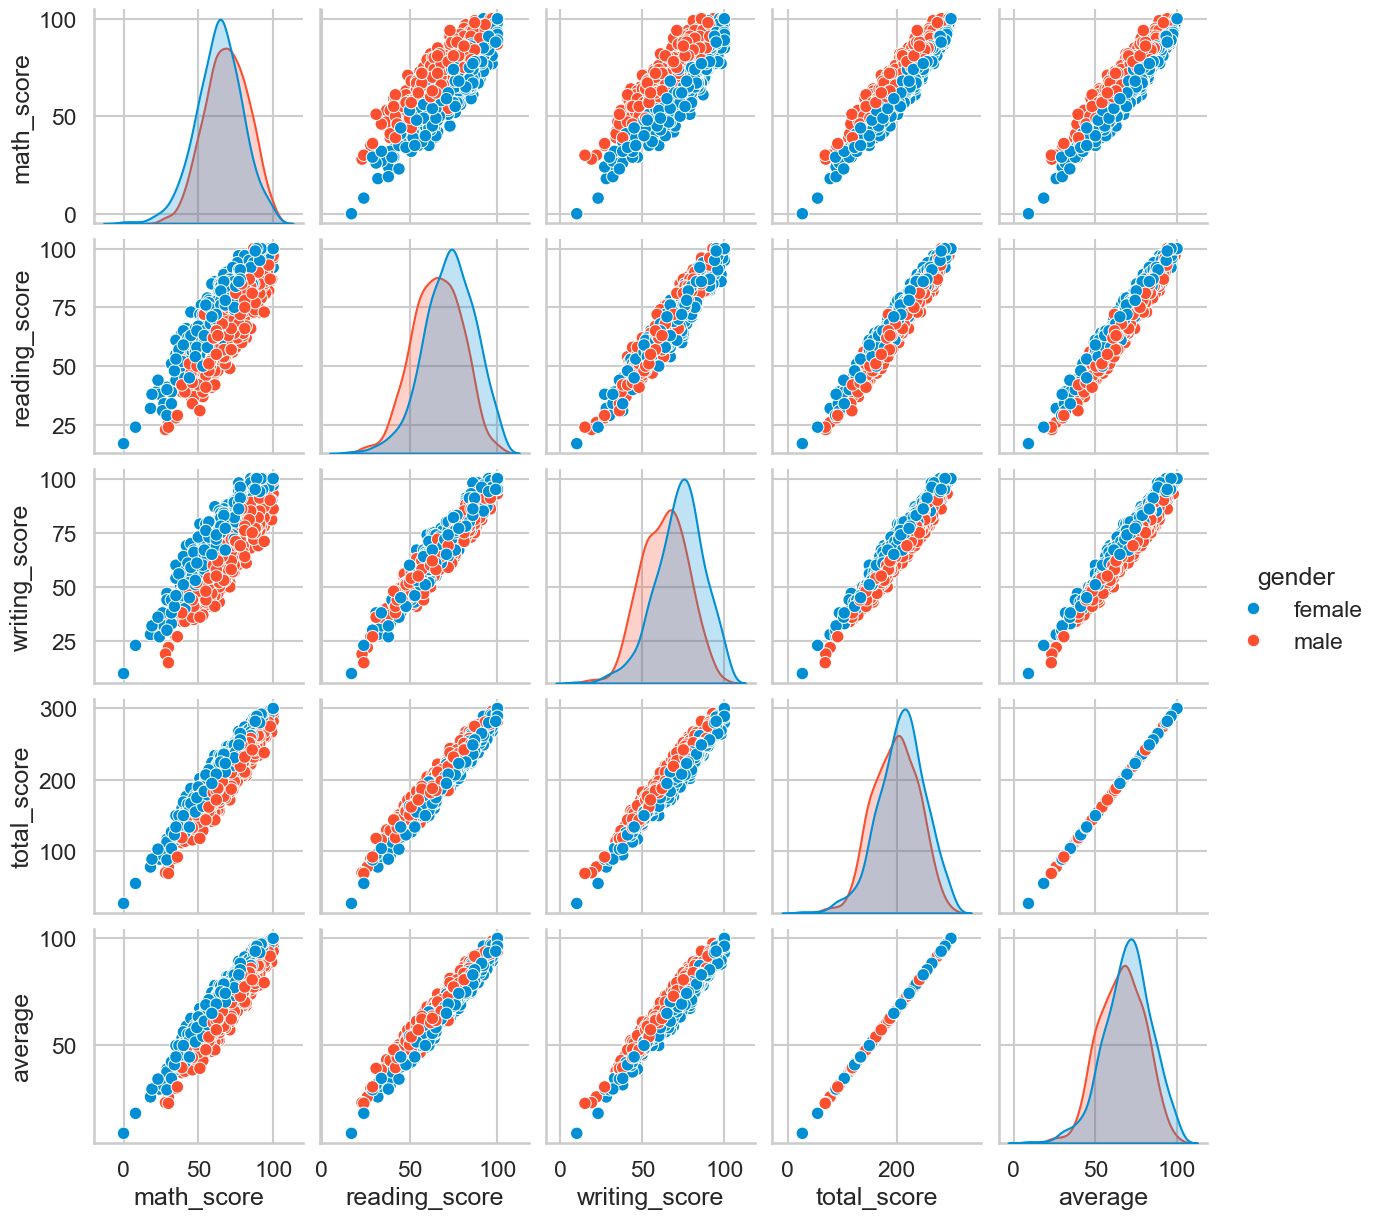

In [133]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

### 7. Conclusions
Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial